For any West Wing fans out there: yes, the seaborn library is named after Sam Seaborn, Rob Lowe's character from The West Wing.

![Sam Seaborn](https://cdn.images.express.co.uk/img/dynamic/20/590x/secondary/west-wing-sam-seaborn-2789458.jpg "Sam Seaborn")

Reflecting this, the common convention is to import Seaborn as `sns` representing the character's initials, Samuel Norman Seaborn. I'm sure that piece of trivia will serve you well.

Seaborn is based upon the matplotlib library, which is one of its dependencies. A lot of what Seaborn does is simply make things that can be done in matplotlib simpler. Documentation for Seaborn is here: https://seaborn.pydata.org/index.html


So the first thing to consider when you're building a data visualization is what you're trying to show. This is a sometimes-helpful chart.

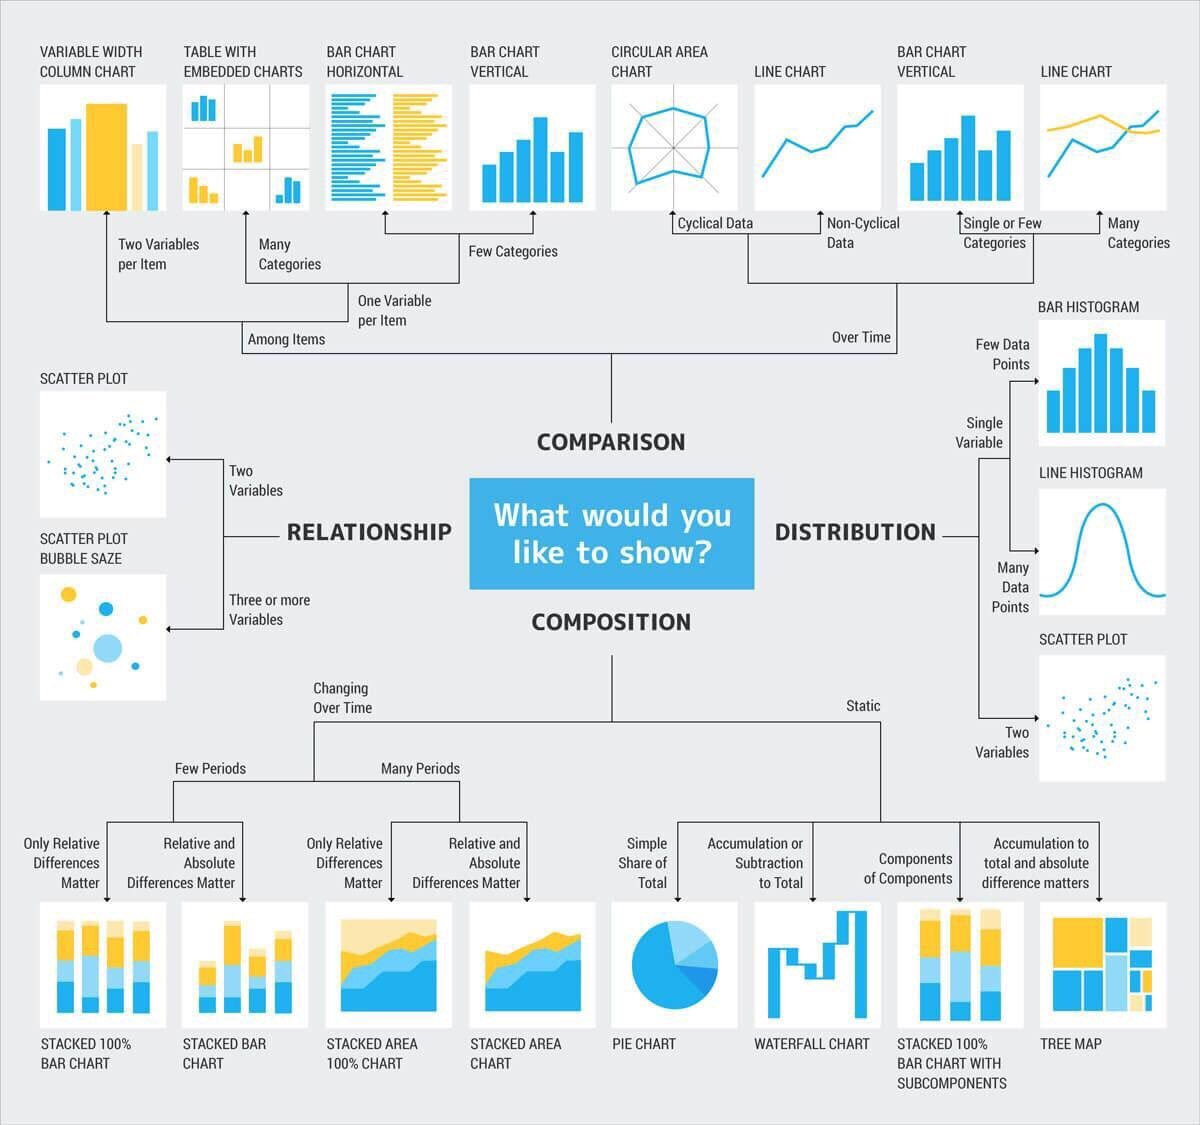

You can find a lot of excellent examples of how to build these various types of visualizations at: https://seaborn.pydata.org/examples/index.html and  https://python-graph-gallery.com/

Let's take a look at some stuff we can build with Seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify_df = pd.read_csv('spotify-2023.csv', encoding='latin')

In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

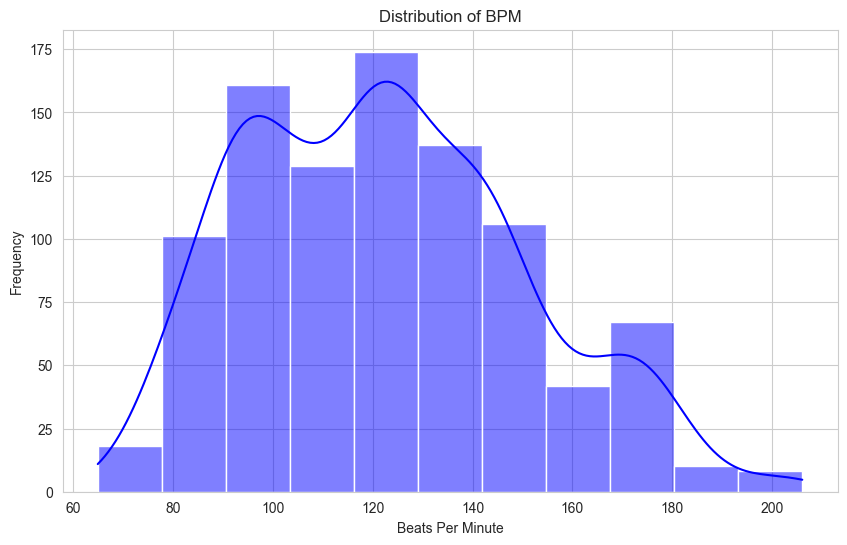

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['bpm'], bins=11, kde=True, color='blue')
plt.xlabel('Beats Per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of BPM')
plt.show()

<Axes: xlabel='bpm', ylabel='danceability_%'>

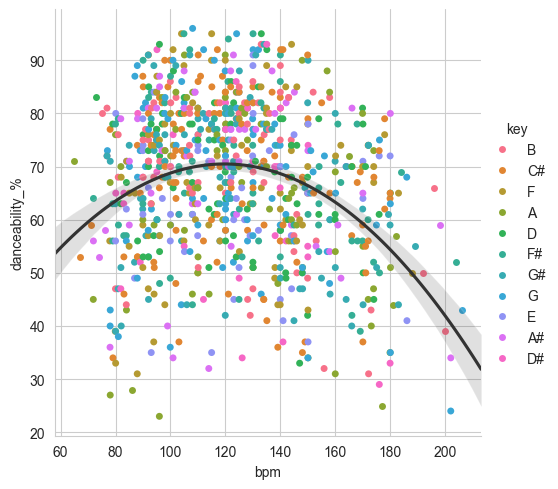

In [14]:
sns.set_style('whitegrid')
sns.catplot(
    data=spotify_df, x="bpm", y="danceability_%", hue='key',
    native_scale=True, zorder=1
)
sns.regplot(
    data=spotify_df, x="bpm", y="danceability_%",
    scatter=False, truncate=False, order=2, color=".2",
)


In [17]:
millenium_df = spotify_df[spotify_df["released_year"] > 2015]
millenium_df = millenium_df.rename(columns={'released_year':'year', 'released_month':'month'})
millenium_df['date'] = pd.to_datetime(millenium_df[['year', 'month']].assign(day=1))
trends_df = millenium_df[["date", "bpm", "danceability_%", "energy_%", "valence_%"]]

trends_df

,date,bpm,danceability_%,energy_%,valence_%
0,2023-07-01,125,80,83,89
1,2023-03-01,92,71,74,61
2,2023-06-01,138,51,53,32
3,2019-08-01,170,55,72,58
4,2023-05-01,144,65,80,23
...,...,...,...,...,...
948,2022-11-01,144,60,39,24
949,2022-10-01,166,42,24,7
950,2022-11-01,92,80,67,81
951,2022-10-01,97,82,77,67


In [19]:
df = trends_df.set_index('date')
df = df.resample('Q', convention='start').mean()

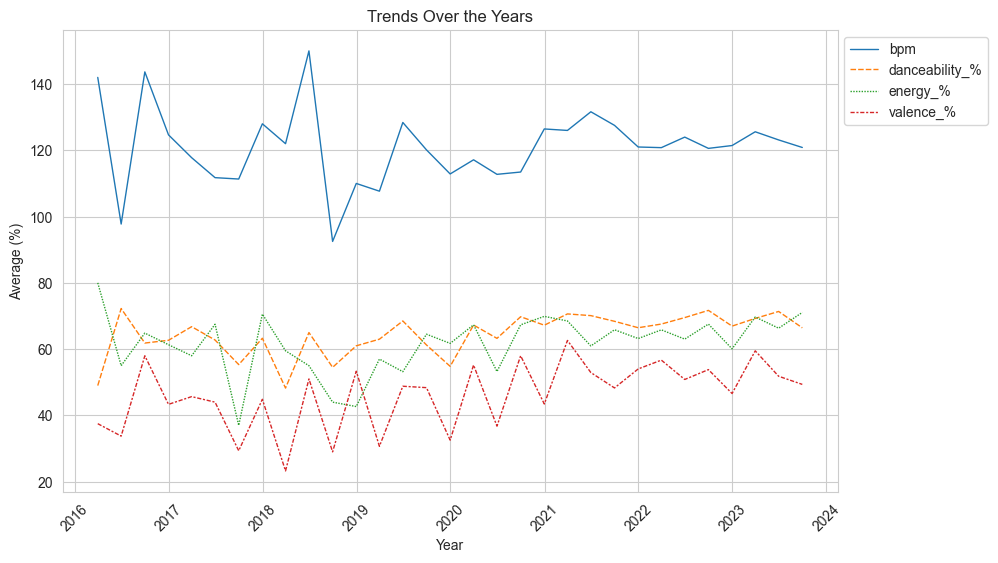

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, lw=1, estimator=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Average (%)')
plt.title('Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

As a quick bonus, I want to teach you about a library called PygWalker, made by [Kanaries](https://kanaries.net/home)

Let's explore our ice skating data.

In [9]:
skating_df = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/performances.csv')

In [21]:
import pygwalker as pyg

gwalker = pyg.walk(skating_df)

Box(children=(HTML(value='<div id="ifr-pyg-2" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [22]:
import pygwalker as pyg

gwalker = pyg.walk(spotify_df)

Box(children=(HTML(value='<div id="ifr-pyg-3" style="height: auto">\n    <head>\n        <meta http-equiv="Con…